<a href="https://colab.research.google.com/github/chahyeonseong/chahyeonseong/blob/main/%EC%BD%94%EB%93%9C_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.인공신경망

In [97]:
#분류예측
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Ashopping (1).csv", encoding = "cp949")
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [99]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [100]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [102]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

##분류예측

In [103]:
#1.변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2.train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#3.데이터 전처리
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '구매금액대', '1회 평균매출액','평균 구매주기','거래기간']),
                         ("onehot", OneHotEncoder (sparse = False), ['구매금액대'])])
ct.fit(X_train)
ct.transform(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4.오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [104]:
#5.모델링
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state = 0, alpha = 0.001, hidden_layer_sizes = [50])
##5-1.모형학습
nn_model.fit(X_train, Y_train)

#6.예측
Y_pred = nn_model.predict(X_test)

In [105]:
#결과값 보고
print("Y 예측값 \n", Y_pred)
print("accuracy(train) : {:.3f}".format(nn_model.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

Y 예측값 
 [1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0]
accuracy(train) : 0.895
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       177
           1       0.84      0.89      0.87       123

    accuracy                           0.89       300
   macro avg       0.88      0.89      0.88       300
weighted avg       0.89      0.89      0.89       300



##회귀예측

In [106]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [107]:
import numpy as np

#1.변수선택
X = df[df.이탈여부 == 0][['방문빈도', '총 할인 금액', '고객등급', '구매유형', '거래기간', '할인민감여부', '평균 구매주기']]
Y = df[df.이탈여부 == 0]["1회 평균매출액"]

#2.train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#3.데이터 전처리
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문빈도', '총 할인 금액', '거래기간','평균 구매주기']),
                         ("onehot", OneHotEncoder (sparse = False), ['고객등급','구매유형','할인민감여부'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [108]:
#4.모델링
from sklearn.neural_network import MLPRegressor

#4-1.모델 생성
nn_reg_model = MLPRegressor(random_state = 0, alpha = 1, max_iter = 2000, hidden_layer_sizes = [50, 50])

#5. 모형학습 및 예측
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#6. 결과값 보고
print("Y predict value : \n", Y_pred)
print("train accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))

Y predict value : 
 [381377.21781942 197278.28016907 203214.15682065 631169.41722701
 110526.68623312 288979.96159774   8428.46115778 152701.98707742
 135152.96667383 303497.54307256 235874.6813267  253282.69139919
 218425.10515726 237646.85386143 348329.13878302 300809.02422235
 404062.80279493 444807.54957896 212515.99034423 299135.0929624
 465598.03074656 107904.9288303  258233.57904121 358787.1040232
   4062.7201121  462632.78454028 399309.18317416 179807.59975679
 186945.41903608 209234.51257141 401090.48896318 465774.4249318
 222188.26871191 459137.05031579 223433.08161207 113525.18501512
 187268.4230029  458567.31945538 132849.99081815 712421.65256802
 348011.663289   178506.06583652 295628.24182627 312832.53284953
 283170.94658072 375445.43308576  10022.52409744 229115.28916526
 360274.20325258 364010.44483594 219457.82631927 640729.11758393
  35514.47129368 431185.38627213 369166.1642805  231021.17268207
 350897.72297123 266920.04765237 325820.39234517 289584.93156037
 388237.

#딥러닝

##경고문 제거

In [109]:
import warnings
warnings.filterwarnings("ignore")

##DNN(DEEP LEARNING : Deep Neural Network)

In [110]:
#1. 변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2. train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#3.데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간']),
                         ("onehot", OneHotEncoder (sparse = False), ['구매금액대'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4.오버샘플링
smote = SMOTE(random_state = 0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [111]:
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

#5.시드값 설정 : 시작점 정해주는거요
np.random.seed(0)
tf.random.set_seed(0)

#6.모형 생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=7, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

#7.모형 학습
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, batch_size=64, verbose=2)

Epoch 1/100
11/11 - 1s - loss: 0.6829 - accuracy: 0.5888 - val_loss: 0.6856 - val_accuracy: 0.6529 - 915ms/epoch - 83ms/step
Epoch 2/100
11/11 - 0s - loss: 0.5836 - accuracy: 0.8254 - val_loss: 0.6330 - val_accuracy: 0.6471 - 59ms/epoch - 5ms/step
Epoch 3/100
11/11 - 0s - loss: 0.5174 - accuracy: 0.8284 - val_loss: 0.6003 - val_accuracy: 0.6765 - 81ms/epoch - 7ms/step
Epoch 4/100
11/11 - 0s - loss: 0.4679 - accuracy: 0.8328 - val_loss: 0.5588 - val_accuracy: 0.7353 - 59ms/epoch - 5ms/step
Epoch 5/100
11/11 - 0s - loss: 0.4343 - accuracy: 0.8595 - val_loss: 0.5102 - val_accuracy: 0.8118 - 74ms/epoch - 7ms/step
Epoch 6/100
11/11 - 0s - loss: 0.4104 - accuracy: 0.8624 - val_loss: 0.5205 - val_accuracy: 0.7882 - 71ms/epoch - 6ms/step
Epoch 7/100
11/11 - 0s - loss: 0.3902 - accuracy: 0.8713 - val_loss: 0.4881 - val_accuracy: 0.8235 - 68ms/epoch - 6ms/step
Epoch 8/100
11/11 - 0s - loss: 0.3756 - accuracy: 0.8802 - val_loss: 0.4970 - val_accuracy: 0.8176 - 76ms/epoch - 7ms/step
Epoch 9/100
11

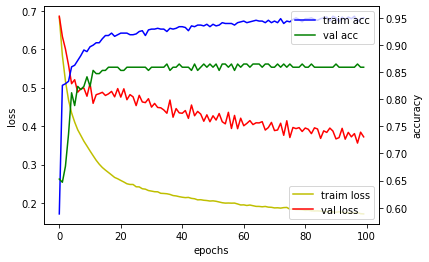

In [112]:
import matplotlib.pyplot as plt
#이제 loss랑 acc그릴거라는 뜻
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

#loss(오차) 그리기
loss_ax.plot(history.history["loss"],"y", label = "traim loss")
loss_ax.plot(history.history["val_loss"],"r", label = "val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc = "lower right")

#accuracy(정확도) 그리기
acc_ax.plot(history.history["accuracy"],"b", label = "traim acc")
acc_ax.plot(history.history["val_accuracy"],"g", label = "val acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc = "upper right")

plt.show()

In [113]:
model.fit(X_train, Y_train, validation_split= 0.2, epochs = 20,
          batch_size= 64, verbose = 1)

Epoch 1/20
11/11 [==============================] - 0s 12ms/step - loss: 0.1702 - accuracy: 0.9497 - val_loss: 0.3680 - val_accuracy: 0.8588
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: 0.1697 - accuracy: 0.9512 - val_loss: 0.3609 - val_accuracy: 0.8588
Epoch 3/20
11/11 [==============================] - 0s 6ms/step - loss: 0.1706 - accuracy: 0.9497 - val_loss: 0.3671 - val_accuracy: 0.8588
Epoch 4/20
11/11 [==============================] - 0s 6ms/step - loss: 0.1696 - accuracy: 0.9497 - val_loss: 0.3579 - val_accuracy: 0.8647
Epoch 5/20
11/11 [==============================] - 0s 6ms/step - loss: 0.1683 - accuracy: 0.9512 - val_loss: 0.3734 - val_accuracy: 0.8588
Epoch 6/20
11/11 [==============================] - 0s 6ms/step - loss: 0.1685 - accuracy: 0.9512 - val_loss: 0.3627 - val_accuracy: 0.8588
Epoch 7/20
11/11 [==============================] - 0s 6ms/step - loss: 0.1688 - accuracy: 0.9527 - val_loss: 0.3614 - val_accuracy: 0.8588
Epoch 8/20
11/11 [=

In [114]:
Y_pred = model.predict(X_test,verbose = 0)
Y_class = np.round(Y_pred, 0)
train_score = model.evaluate(X_train, Y_train, verbose = 0)
test_score = model.evaluate(X_test, Y_test, verbose = 0)
test_score = model.evaluate(X_test, Y_test, verbose = 0)
print("Y 예측값 : \n ",Y_pred[:5])
print("Y 예측 클래스 : \n ", Y_class[:5])
print("train accuracy ; {:.3f}".format(train_score[0], train_score[1]))
print("test accuracy ; {:.3f}".format(test_score[0], test_score[1]))

Y 예측값 : 
  [[0.93126047]
 [1.        ]
 [0.01772536]
 [0.01244921]
 [0.99973166]]
Y 예측 클래스 : 
  [[1.]
 [1.]
 [0.]
 [0.]
 [1.]]
train accuracy ; 0.202
test accuracy ; 0.224


##회귀 예측

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [116]:
#1. 데이터 만들기
X = df[df.이탈여부 == 0][['방문빈도','총 할인 금액','구매카테고리수','거래기간']]
Y = np.log1p(df[df.이탈여부 == 0]['1회 평균매출액'])

In [117]:
#2. train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#3.데이터 전처리(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#4. seed 값 설정
np.random.seed(0)
tf.random.set_seed(0)

#5. 모형 생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim = 4, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))

#6. 모형 학습
model.compile(loss = "mse", optimizer = "SGD")
Y_pred = np.round(model.predict(X_test[:5],verbose = 0),3)
print("Y predict value \n", Y_pred)

#7. 모형 평가
train_score = model.evaluate(X_train, Y_train, verbose = 0)
test_score = model.evaluate(X_test, Y_test, verbose = 0)
print("train mse : {:.3f}".format(train_score))
print("test mse : {:.3f}".format(test_score))

Y predict value 
 [[0.    0.    0.    0.234 0.    0.163 0.052 0.    0.    0.    0.    0.32
  0.013 0.    0.218 0.009 0.111 0.    0.182 0.    0.    0.    0.474 0.143
  0.    0.    0.    0.    0.    0.    0.325 0.    0.    0.224 0.    0.098
  0.115 0.    0.    0.055 0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.322 0.12  0.098 0.    0.336 0.142 0.    0.    0.394 0.    0.498
  0.    0.    0.182 0.   ]
 [0.    0.    0.    0.002 0.    0.134 0.114 0.    0.109 0.    0.    0.058
  0.061 0.043 0.042 0.027 0.06  0.097 0.114 0.    0.    0.001 0.14  0.
  0.081 0.017 0.    0.034 0.    0.    0.012 0.009 0.    0.045 0.    0.039
  0.    0.    0.    0.109 0.    0.009 0.004 0.    0.    0.    0.    0.
  0.059 0.097 0.074 0.026 0.    0.014 0.184 0.    0.002 0.061 0.075 0.146
  0.    0.    0.289 0.   ]
 [0.    0.    0.079 0.012 0.    0.056 0.061 0.    0.175 0.    0.089 0.14
  0.002 0.    0.254 0.04  0.094 0.183 0.181 0.    0.058 0.    0.385 0.058
  0.    0.    0.    0.057 0.    0.    0.144 0.051 0

##앙상블(Ensemble)

In [118]:
#1.변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2.train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#3.데이터 전처리
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액','평균 구매주기','거래기간']),
                         ("onehot", OneHotEncoder (sparse = False), ['구매금액대'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4.오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [119]:
#5. 단일모형 생성
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

dtree = DecisionTreeClassifier(random_state = 0 )
knn = KNeighborsClassifier()

#6. 앙상블 모형 생성
model = VotingClassifier(estimators = [("K-NN", knn),("Dtree", dtree)], voting = "soft")

#7. 모형 학습
model.fit(X_train, Y_train)

#8. 예측 및 모형 성능 평가
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
#8-1. 보팅 모형 정확도
print("Voting classifier accuracy : {0:.3f}".format(model.score(X_test, Y_test)))
#8-2. 개별 모형 정확도
classifiers = [dtree, knn]
for classifier in classifiers :
    classifier.fit(X_train, Y_train)
    class_name = classifier.__class__.__name__
    print("{0} accuracy : {1:.3f}".format(class_name, classifier.score(X_test,Y_test)))

Y predict value: 
 [1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 0]
Voting classifier accuracy : 0.907
DecisionTreeClassifier accuracy : 0.900
KNeighborsClassifier accuracy : 0.850


##회귀 예측

In [120]:
import numpy as np

#1.변수선택
X = df[df.이탈여부 == 0][['방문빈도', '총 할인 금액', '고객등급', '구매유형', '거래기간', '할인민감여부', '평균 구매주기']]
Y = np.log1p(df[df.이탈여부 == 0]["1회 평균매출액"])

#2.train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#3.데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문빈도', '총 할인 금액', '거래기간','평균 구매주기']),
                         ("onehot", OneHotEncoder (sparse = False), ['고객등급','구매유형','할인민감여부'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [121]:
#4. 단일 모형 생성
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

svr = SVR()
mlp = MLPRegressor(random_state = 0)

#5.Voting model 생성
model = VotingRegressor(estimators = [("SVR", svr),("MLP", mlp)])

#6. 모형 학습
model.fit(X_train, Y_train)

#7.예측 및 평가
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)

#8-1. 예측 보팅 모형 정확도
print("Voting regressor accuracy(R2) : {0:.3f}".format(model.score(X_test, Y_test)))
#8-2. 개별 모형 정확도
Regressors = [svr, mlp]
for Regressor in Regressors :
    Regressor.fit(X_train, Y_train)
    class_name = Regressor.__class__.__name__
    print("{0} accuracy : {1:.3f}".format(class_name, Regressor.score(X_test,Y_test)))

Y predict value: 
 [12.72637282 12.15785517 12.09686124 13.26831502 11.60231958 12.47233857
 11.00403584 12.11236139 11.92418038 12.36295705 12.33471768 11.93634366
 12.10248328 12.17485959 12.54047237 12.21174042 12.79796392 12.85868158
 12.14723369 12.51820132 12.73655925 11.51053651 12.16572772 12.61967869
 10.97450508 13.11252037 12.5792913  12.13627155 12.04792775 11.98604929
 12.79524713 12.95793432 12.51574594 13.14826771 12.21608558 11.91077705
 11.84798695 12.99567742 11.95362493 13.66455063 12.85068225 12.1427706
 12.49680643 12.12413092 12.41795186 12.43119996 11.29956398 12.14660018
 12.69704459 12.43998557 12.01109351 13.29011823 11.1046136  12.92296162
 12.8522466  12.08692287 12.46809297 12.34155171 12.26251834 12.06954504
 12.87142564 12.96736873 11.66603809 12.35227513 12.06159606 12.155967
 12.10647664 11.48482286 12.69218789 11.79509489 12.20279207 11.67227129
 11.93748831 11.75242257 12.08799173 12.79011812 12.43771399 12.93671652
 12.21409548 12.39436336 12.7174692

#Random Forest

##분류모델

In [122]:
#1.변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간']), 
                        ("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4. 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [123]:
#5. 모형 생성
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 0, n_estimators = 300, max_depth = 3)

#6. 모형 예측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))

Y predict value: 
 [1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0]
accuracy(test) : 0.947
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       177
           1       0.99      0.88      0.93       123

    accuracy                           0.95       300
   macro avg       0.96      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300



##회귀예측

In [124]:
#1.변수선택
X = df[df.이탈여부 == 0][['방문빈도', '총 할인 금액', '고객등급', '구매유형', '거래기간', '할인민감여부', '평균 구매주기']]
Y = np.log1p(df[df.이탈여부 == 0]["1회 평균매출액"])

#2.train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#3.데이터 전처리
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문빈도', '총 할인 금액', '거래기간','평균 구매주기']),
                         ("onehot", OneHotEncoder (sparse = False), ['고객등급','구매유형','할인민감여부'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [125]:
#4. 모형 생성
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 0, n_estimators = 100, max_depth = 4)

#5. 모형 예측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
print("accuracy(R2) : {:.3f}".format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : ",rmse)

Y predict value : 
 [12.68641835 12.12514749 12.04819279 13.04580899 11.50906768 12.45183582
 11.28296585 12.28747852 11.86494273 12.35358139 12.3872265  12.00638164
 12.3207311  12.16711163 12.72553    12.43847827 12.70631401 12.74484282
 11.93548044 12.48363036 12.70833215 11.50205816 12.3872265  12.61313248
 11.14155529 12.85315034 12.69646319 12.2799654  12.29330952 12.07066037
 12.7318708  13.03072124 12.44587063 12.83922589 11.99165355 11.93548044
 12.07982016 12.87533113 11.92291372 13.17748045 12.77463562 12.29742037
 12.44945001 12.27423314 12.44938301 12.68738612 11.48744293 12.09294686
 12.70377324 12.45477652 11.86470087 13.59076876 11.23433862 12.13775744
 12.70918345 12.34530688 12.67303461 12.40944139 12.28433595 12.36128948
 12.7008786  12.57507179 12.11883138 12.44859275 12.29201016 11.82194505
 11.91682041 11.55244151 13.0432612  12.01568152 12.38104273 11.77753274
 11.91986181 11.77914657 12.32409993 13.20140162 12.67190941 12.99665869
 12.1142171  12.38934131 12.448

#GarientBoosting

##분류예측

In [126]:
#1.변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간']), 
                        ("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4. 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [127]:
#5.모형 생성
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state = 0, n_estimators = 100, max_depth = 4, 
                                   learning_rate = 0.1)

#6.모형 학습 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))

Y predict value: 
 [1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0
 0 0 0 0]
accuracy(test) : 0.933
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       177
           1       0.95      0.89      0.92       123

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



##회귀예측

In [128]:
#1.변수선택
X = df[df.이탈여부 == 0][['방문빈도', '총 할인 금액', '고객등급', '구매유형', '거래기간', 
                   '할인민감여부', '평균 구매주기']]
Y = np.log1p(df[df.이탈여부 == 0]["1회 평균매출액"])

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문빈도', '총 할인 금액', '거래기간', '평균 구매주기']), 
                        ("onehot", OneHotEncoder(sparse = False), ['고객등급', '구매유형', '할인민감여부'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [129]:
#4. 모형생성
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state = 0, n_estimators = 100, max_depth = 4, 
                                   learning_rate = 0.1)

#5. 모형 학습 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
print("accracy(R2) : {:.3f}".format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value : 
 [12.62344813 12.25583406 12.09458751 13.07090617 11.40422303 12.45220348
 11.61198904 12.45651119 12.08328814 12.32640447 12.39533751 12.23594472
 12.13577357 12.24057416 12.73503493 12.29364736 12.84361351 12.99742565
 11.76512764 12.45752565 12.63483127 11.38579233 12.41560355 12.50712961
 10.79435548 12.62928969 12.60613938 11.92964399 12.34916462 12.07520652
 12.57121312 13.01697524 12.39965923 13.03165827 12.11711146 12.09888134
 12.18727902 12.94489209 11.93717047 13.18376863 12.76957258 12.21597158
 12.54049819 12.10678757 12.64544285 12.59000213 11.18198188 12.13358256
 12.5668075  12.42634623 11.81913361 13.52008205 11.10458182 12.09979475
 13.07232151 12.20069308 12.66489797 12.28476526 11.98447614 12.31654311
 12.79736561 12.76535462 11.92863698 12.44145179 12.12157567 12.10310068
 11.87519738 11.62364672 12.99672955 12.27936785 12.36258046 11.70831635
 11.91861812 11.96233767 12.15305515 13.12437922 12.65319979 12.93053239
 12.03260309 12.25751434 12.000

#Text Minning

In [130]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
article_txt = open("/content/drive/MyDrive/article.txt" , "rt" , encoding = "UTF-8"). read()

In [132]:
article_txt

'산업부 13일 산업 AI 내재화 전략 심의 후 확정\nAI 활용 기업 비중 2030년까지 30%까지 늘릴 계획\n삼성전자 등 글로벌 반도체 기업도 AI 투자 전망도\n정부가 국내 AI(인공지능) 활용 기업 비중을 2030년까지 30%로 늘린다. 글로벌 경쟁력을 갖춘 AI 기술 공급 기업도 100개 이상 육성한다.\n\n\n국제신문DB\n산업통상자원부는 13일 서울 중구 대한상공회의소에서 이창양 산업부 장관과 민관 전문가가 참석한 가운데 제1차 산업 디지털 전환 위원회를 열고 이 같은 내용의 ‘산업 AI 내재화 전략’을 심의·확정했다고 밝혔다.\n\n우선 올해 5개 프로젝트에 각각 10억 원의 자금을 지원하고 내년 신규 예산을 확보해 AI 활용 기업을 2030년까지 30%로 확대할 계획이다. 기업의 AI 활용 기반 구축도 한다. 정부는 디지털 전환(DX) 투자와 성과 창출이 가능한 기업 500개사에 데이터 처리 플랫폼과 사물인터넷(IoT) 시스템과 같은 AI 활용 기반 마련을 지원할 방침이다.\n\n중견·중소기업의 AI 투자 자금 지원을 위해 2020년부터 2024년까지 총 4000억 원(매년 800억 원) 규모의 산업 DX펀드를 조성하는 사업도 계속 진행한다. 산업 AI 융합인력 양성을 위해 AI 비전공 대학생 구직자 재직자를 대상으로 하는 단기 압축 교육과정을 개설해 올해 100명, 내년 400명의 인재도 배출한다.\n\n산업부에 따르면 국내 제조업계의 데이터와 AI 활용률은 각각 8.4%와 1.6%에 불과한 것으로 나타났다. 주력 산업은 여전히 디지털 전환이 더디게 진행되고 있다. 디지털 기술 투자는 클라우드에 절반가량이 집중돼 있고 AI 투자 비중은 1.7%에 불과하다. 이에 디지털 전환이 필요한 기업의 핵심 설비와 공정에 AI 솔루션을 적용하는 프로젝트를 추진해 산업 전반에 AI를 내재화한다는 이번 전략을 세웠다. 정부는 이날 첫 회의를 연 민관 합동 산업 디지털 전환 위원회를 디지털 전환 정책의 콘트롤타워로 지속해서 운영할 방침이다.\n\n삼성전자 

In [133]:
from konlpy.tag import Okt
from collections import Counter

In [134]:
okt = Okt() #okt라는 함수요
line = []

line = okt.pos(article_txt) #pos는 품사를 붙여줘요
n_adj = [] #명사_형용사만 카운트를 할거랍숑
for word, tag in line :
    if tag in ["Noun","Adjustive"]:
        n_adj.append(word)
print(n_adj) #리스트 안에 명사랑 형용사만 뽑아서 print 해줭

['산업부', '산업', '재화', '전략', '심의', '후', '확정', '활용', '기업', '비중', '계획', '삼성', '전자', '등', '글로벌', '반도체', '기업', '투자', '전망', '정부', '국내', '인공', '지능', '활용', '기업', '비중', '로', '글로벌', '경쟁력', '기술', '공급', '기업', '개', '이상', '육성', '국제', '신문', '산업', '통상', '자원부', '서울', '중구', '상공회의소', '이창', '산업부', '장관', '민관', '전문가', '참석', '가운데', '제', '차', '산업', '디지털', '전환', '위원회', '이', '내용', '산업', '재화', '전략', '심의', '확정', '우선', '올해', '개', '프로젝트', '각각', '원', '자금', '지원', '내년', '신규', '예산', '확보', '활용', '기업', '로', '확대', '계획', '기업', '활용', '기반', '구축', '정부', '디지털', '전환', '투자', '성과', '창', '기업', '개사', '데이터', '처리', '플랫폼', '사물인터넷', '시스템', '활용', '기반', '마련', '지원', '방침', '중견', '중소기업', '투자', '자금', '지원', '위해', '총', '원', '매년', '원', '규모', '산업', '펀드', '조성하', '사업', '계속', '진행', '산업', '융합', '인력', '양성', '위해', '비', '전공', '대학생', '구직', '재직', '대상', '단기', '압축', '교육과정', '개설', '올해', '명', '내년', '명의', '인재', '배출', '산업부', '국내', '제조업', '데이터', '활용', '률', '각각', '것', '주력', '산업', '디지털', '전환', '진행', '디지털', '기술', '투자', '클라우드', '절반', '가량', '집중', '투자', '비중', '이', '디지털

In [135]:
#보기 불편한 값이 나왔으니까 축약을 해보쟈!
counts = Counter(n_adj)
tags = counts.most_common(20)
print(counts)
print(tags)

Counter({'기업': 10, '산업': 9, '반도체': 9, '투자': 8, '활용': 7, '디지털': 7, '전환': 6, '원': 6, '설계': 6, '기반': 4, '산업부': 3, '재화': 3, '전략': 3, '비중': 3, '글로벌': 3, '전망': 3, '정부': 3, '로': 3, '이상': 3, '올해': 3, '지원': 3, '것': 3, '업체': 3, '심의': 2, '확정': 2, '계획': 2, '삼성': 2, '전자': 2, '등': 2, '국내': 2, '기술': 2, '개': 2, '민관': 2, '위원회': 2, '이': 2, '프로젝트': 2, '각각': 2, '자금': 2, '내년': 2, '데이터': 2, '방침': 2, '위해': 2, '규모': 2, '진행': 2, '핵심': 2, '를': 2, '컨설팅': 2, '개발': 2, '생산': 2, '후': 1, '인공': 1, '지능': 1, '경쟁력': 1, '공급': 1, '육성': 1, '국제': 1, '신문': 1, '통상': 1, '자원부': 1, '서울': 1, '중구': 1, '상공회의소': 1, '이창': 1, '장관': 1, '전문가': 1, '참석': 1, '가운데': 1, '제': 1, '차': 1, '내용': 1, '우선': 1, '신규': 1, '예산': 1, '확보': 1, '확대': 1, '구축': 1, '성과': 1, '창': 1, '개사': 1, '처리': 1, '플랫폼': 1, '사물인터넷': 1, '시스템': 1, '마련': 1, '중견': 1, '중소기업': 1, '총': 1, '매년': 1, '펀드': 1, '조성하': 1, '사업': 1, '계속': 1, '융합': 1, '인력': 1, '양성': 1, '비': 1, '전공': 1, '대학생': 1, '구직': 1, '재직': 1, '대상': 1, '단기': 1, '압축': 1, '교육과정': 1, '개설': 1, '명': 1, '명의': 1, '인재': 1, '배출':

In [136]:
stop_words = "있습니다. 를 로 수 때문"
stop_words = set(stop_words.split(" "))
n_adj = [word for word in n_adj if not word in stop_words]

In [137]:
#위를 기반으로 word clowd를 뽑아보게따!
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

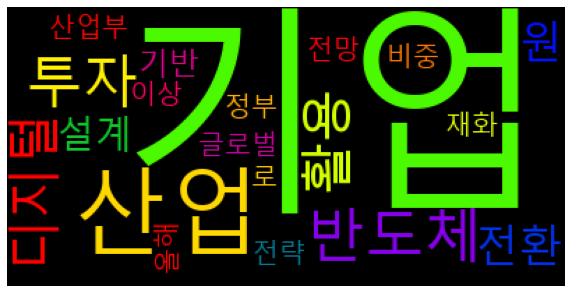

In [138]:
font = "/content/drive/MyDrive/malgun.ttf"
word_cloud = WordCloud(font_path=font, background_color="black", max_font_size=300,colormap="prism").generate_from_frequencies(dict(tags))
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.imshow(word_cloud)
plt.axis("off")

#네이버 데이터 랩


In [139]:
import pandas as pd
import urllib.request
import json


client_id = "bXCcG0HzYsuvuzZhVYPU"
client_secret = "jAoNOvkGeU"

url = "https://openapi.naver.com/v1/datalab/search"
body = "{\
         \"startDate\":\"2022-01-01\",\
         \"endDate\":\"2023-01-10\",\
         \"timeUnit\":\"date\",\
         \"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},\
                             {\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}\
                            ],\
         \"device\":\"pc\",\
         \"ages\":[\"1\",\"2\"],\
         \"gender\":\"f\"\
         }";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))

rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    response_data = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

result = json.loads(response_data)

print(result)

date = [a['period'] for a in result['results'][0]['data']]
ratio_data1 = [a['ratio'] for a in result['results'][0]['data']]
ratio_data2 = [a['ratio'] for a in result['results'][1]['data']]

pd.DataFrame({'date':date,
        'seraching_result':ratio_data1,
        'searching_result2':ratio_data2})

{'startDate': '2022-01-01', 'endDate': '2023-01-10', 'timeUnit': 'date', 'results': [{'title': '한글', 'keywords': ['한글', 'korean'], 'data': [{'period': '2022-01-01', 'ratio': 17.64705}, {'period': '2022-01-02', 'ratio': 18.62745}, {'period': '2022-01-03', 'ratio': 26.47058}, {'period': '2022-01-04', 'ratio': 20.58823}, {'period': '2022-01-05', 'ratio': 11.7647}, {'period': '2022-01-06', 'ratio': 27.45098}, {'period': '2022-01-07', 'ratio': 21.56862}, {'period': '2022-01-08', 'ratio': 15.68627}, {'period': '2022-01-09', 'ratio': 23.52941}, {'period': '2022-01-10', 'ratio': 17.64705}, {'period': '2022-01-11', 'ratio': 11.7647}, {'period': '2022-01-12', 'ratio': 25.49019}, {'period': '2022-01-13', 'ratio': 11.7647}, {'period': '2022-01-14', 'ratio': 19.60784}, {'period': '2022-01-15', 'ratio': 11.7647}, {'period': '2022-01-16', 'ratio': 24.5098}, {'period': '2022-01-17', 'ratio': 23.52941}, {'period': '2022-01-18', 'ratio': 10.78431}, {'period': '2022-01-19', 'ratio': 10.78431}, {'period':

,date,seraching_result,searching_result2
0,2022-01-01,17.64705,9.80392
1,2022-01-02,18.62745,9.80392
2,2022-01-03,26.47058,18.62745
3,2022-01-04,20.58823,12.74509
4,2022-01-05,11.76470,17.64705
...,...,...,...
370,2023-01-06,16.66666,5.88235
371,2023-01-07,12.74509,6.86274
372,2023-01-08,17.64705,3.92156
373,2023-01-09,14.70588,6.86274


In [140]:
import pandas as pd
import urllib.request
import json


client_id = "bXCcG0HzYsuvuzZhVYPU"
client_secret = "jAoNOvkGeU"

url = "https://openapi.naver.com/v1/datalab/search"
body = "{\
         \"startDate\":\"2022-01-01\",\
         \"endDate\":\"2023-01-10\",\
         \"timeUnit\":\"date\",\
         \"keywordGroups\":[{\"groupName\":\"삼성\",\"keywords\":[\"삼성\",\"samsung\"]}],\
         \"device\":\"pc\",\
         \"ages\":[\"1\",\"2\"],\
         \"gender\":\"f\"\
         }";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))

rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    response_data = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

result = json.loads(response_data)

print(result)

date = [a['period'] for a in result['results'][0]['data']]
ratio_data1 = [a['ratio'] for a in result['results'][0]['data']]


pd.DataFrame({'date':date,
        'seraching_result':ratio_data1,})

{'startDate': '2022-01-01', 'endDate': '2023-01-10', 'timeUnit': 'date', 'results': [{'title': '삼성', 'keywords': ['삼성', 'samsung'], 'data': [{'period': '2022-01-01', 'ratio': 61.90476}, {'period': '2022-01-02', 'ratio': 66.66666}, {'period': '2022-01-03', 'ratio': 53.96825}, {'period': '2022-01-04', 'ratio': 53.96825}, {'period': '2022-01-05', 'ratio': 46.03174}, {'period': '2022-01-06', 'ratio': 44.44444}, {'period': '2022-01-07', 'ratio': 44.44444}, {'period': '2022-01-08', 'ratio': 74.60317}, {'period': '2022-01-09', 'ratio': 47.61904}, {'period': '2022-01-10', 'ratio': 42.85714}, {'period': '2022-01-11', 'ratio': 44.44444}, {'period': '2022-01-12', 'ratio': 42.85714}, {'period': '2022-01-13', 'ratio': 36.50793}, {'period': '2022-01-14', 'ratio': 34.92063}, {'period': '2022-01-15', 'ratio': 46.03174}, {'period': '2022-01-16', 'ratio': 61.90476}, {'period': '2022-01-17', 'ratio': 55.55555}, {'period': '2022-01-18', 'ratio': 57.14285}, {'period': '2022-01-19', 'ratio': 33.33333}, {'pe

,date,seraching_result
0,2022-01-01,61.90476
1,2022-01-02,66.66666
2,2022-01-03,53.96825
3,2022-01-04,53.96825
4,2022-01-05,46.03174
...,...,...
370,2023-01-06,23.80952
371,2023-01-07,17.46031
372,2023-01-08,38.09523
373,2023-01-09,20.63492


In [141]:
import os
import sys
import urllib.request
client_id = "JC9If3H4OTESpxkp2bGt" #발급받은 ID 입력
client_secret = "YQU6qmmIUH" #발급받은 PW 입력
encText = urllib.parse.quote("삼성") # 검색할 단어 입력
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
    json_str = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)
json_object  = json.loads(json_str) #json 변환
df = pd.DataFrame(json_object['items'][:10])
json_str= response_body.decode('utf-8')
df= pd.DataFrame(json_object['items'][:10])

df['title'] = df['title'].str.replace("<b>", "")
df['title'] = df['title'].str.replace("</b>", "")
df['description'] = df['description'].str.replace("<b>", "")
df['description'] = df['description'].str.replace("</b>", "")
df

{
	"lastBuildDate":"Tue, 17 Jan 2023 16:30:21 +0900",
	"total":13868663,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>삼성<\/b>카드 달달할인 지원 최대로 받기",
			"link":"https:\/\/blog.naver.com\/titimu\/222980193913",
			"description":"<b>삼성<\/b>카드 달달할인 지원 최대로 받기 안녕하세요 최근에는 경제가 불황기가 시작이 되면서 많은... 경우에는 <b>삼성<\/b>카드 달달할인 연회비 면제 혜택과 더불어 추가 현금 지원 등 상담을 통해서 맞춤 지원을... ",
			"bloggername":"하늬비",
			"bloggerlink":"blog.naver.com\/titimu",
			"postdate":"20230110"
		},
		{
			"title":"아티드 <b>삼성<\/b> 대치동 오피스텔 분양가 정보",
			"link":"https:\/\/blog.naver.com\/lg1001\/222952614275",
			"description":"아티드 <b>삼성<\/b> 대치동 오피스텔 분양가 정보 부동산은 시세는 상대적으로 잘 방어하는 지역들이... 오늘은 그 안에서도 많은 호재로 비전까지 겸비한 권역에 위치하는 아티드 <b>삼성<\/b>의 소식을... ",
			"bloggername":"부자 집구경",
			"bloggerlink":"blog.naver.com\/lg1001",
			"postdate":"20221211"
		},
		{
			"title":"<b>삼성<\/b> 달달할인카드 발급 빠르게",
			"link":"https:\/\/blog.naver.com\/yoona020409\/222973853116",
			"description":"<b>삼성<\/b> 달달할인카드 발급 빠르게 안녕하세요 다들 관리비나 정기결제에 대해서 어떻게 관리하고...

,title,link,description,bloggername,bloggerlink,postdate
0,삼성카드 달달할인 지원 최대로 받기,https://blog.naver.com/titimu/222980193913,삼성카드 달달할인 지원 최대로 받기 안녕하세요 최근에는 경제가 불황기가 시작이 되면...,하늬비,blog.naver.com/titimu,20230110
1,아티드 삼성 대치동 오피스텔 분양가 정보,https://blog.naver.com/lg1001/222952614275,아티드 삼성 대치동 오피스텔 분양가 정보 부동산은 시세는 상대적으로 잘 방어하는 지...,부자 집구경,blog.naver.com/lg1001,20221211
2,삼성 달달할인카드 발급 빠르게,https://blog.naver.com/yoona020409/222973853116,삼성 달달할인카드 발급 빠르게 안녕하세요 다들 관리비나 정기결제에 대해서 어떻게 관...,웃으며 살아봐요~!!,blog.naver.com/yoona020409,20230103
3,힐스테이트 삼성 오피스텔 공급안내,https://blog.naver.com/yess888/222972712194,힐스테이트 삼성 오피스텔 공급안내 전국적으로 미분양 물량이 나오는 상황이지만 이미 ...,그린라이트,blog.naver.com/yess888,20230102
4,삼성 암보험 비교사이트를 활용하시길 추천드려요,https://blog.naver.com/7942cjh/222972571029,금일은 삼성 암보험을 확인해보시는 아직젊은 사람들한테는 한 곳에만 10년 이상 갖고...,TEMPO,blog.naver.com/7942cjh,20230102
5,삼성 달달할인카드 선호하는 이유,https://blog.naver.com/dlzpdlwl002/222966277896,오늘은 삼성 달달할인카드 혜택에 대해서 자세히 안내부터 해드리고 기분 좋게 발급하는...,♥ 애기야 노올자 ♥,blog.naver.com/dlzpdlwl002,20221226
6,힐스테이트 삼성 공급안내,https://blog.naver.com/loveparadox2/222970265218,힐스테이트 삼성 공급안내 삼성동은 강남구 내에서도 지속적인 발전과 주거품질 상향 평...,재테크 부동산 연구소,blog.naver.com/loveparadox2,20221230
7,힐스테이트 삼성 오피스텔 공급조건,https://blog.naver.com/dps871106/222970835908,힐스테이트 삼성 오피스텔 공급조건 우리나라에서 땅값이 가장 비싼 황금노른자 땅이라고...,(주)대경글로벌,blog.naver.com/dps871106,20221231
8,삼성 보급형 스마트폰! 갤럭시 A23 자급제 어떤 부분이...,https://blog.naver.com/whitepolarbear/22297880...,그래서 자연스럽게 삼성 보급형 스마트폰에 관심이 가더라고요. 그중 갤럭시 A23 자...,하얀 북극곰의 일상,blog.naver.com/whitepolarbear,20230109
9,삼성 암보험 현명하게 저렴한 가격에 가입하는 꿀팁,https://blog.naver.com/zkvpdls0536/222968257323,요즘 삼성 암보험의 경우에도 그러합니다. 기존 10대까지 가입이 가능했던 어린이 보...,카페인의 게임 라이브러리™,blog.naver.com/zkvpdls0536,20221228
